In [68]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import sys
import import_ipynb
# 폴더내의 파일을 리스트로 반환해주는 함수.
from search import *
# image 에서 파란색상만 추출하여 흑백 처리 해주는 함수.
from get_blue import *

def get_bowling_board(link):
    image = cv2.imread(link, cv2.IMREAD_COLOR)
    origin = image.copy()
    origin = cv2.cvtColor(origin, cv2.COLOR_BGR2RGB)
    
    H,W,C = image.shape
    
    # 이미지 2진화
    image = get_blue(image, 0)

    # 이미지 2진화
    imgray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # 이미지 스레스홀딩
    img_thresh = cv2.adaptiveThreshold(imgray, maxValue = 255.0,
                                      adaptiveMethod = cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                      thresholdType = cv2.THRESH_BINARY_INV,
                                      blockSize = 19, C = 9)
    
    # 컨투어(외곽선) 찾기
    contours, _ = cv2.findContours(img_thresh, mode = cv2.RETR_LIST, method = cv2.CHAIN_APPROX_SIMPLE)

    # 외관선용 배열
    temp_result = np.zeros((H, W, C), dtype = np.uint8)

    # 외곽선 그리기
    cv2.drawContours(temp_result, contours = contours, contourIdx = -1, color = (255,255,255))
    
    # 외곽선을 사각형화 시키기.
    contours_dict = []
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        cv2.rectangle(temp_result, pt1 = (x,y), pt2 = (x+w, y+h), color = (255,255,255), thickness = 2)
        contours_dict.append({
            'contour' : contour,
            'x' : x,
            'y' : y,
            'w' : w,
            'h' : h,
            'cx' : x + (w/2),
            'cy' : y + (h/2)
        })

    # 볼링 점수판 좌표
    bowling_board = []

    # 가장 큰 사각형이 볼링 점수판일 확률이 높다. 
    temp_max = 0
    for d in contours_dict:
        area = d['w'] * d['h']
        ratio = d['w'] / d['h']

        if temp_max < area:
            temp_max = area

    for d in contours_dict:
        area = d['w'] * d['h']
        ratio = d['w'] / d['h']

        if area == temp_max:
            bowling_board.append(d)
    temp_result = np.zeros((H,W,C), dtype = np.uint8)

    for d in bowling_board:
        cv2.rectangle(temp_result, pt1 = (d['x'], d['y']), pt2 = (d['x']+d['w'], d['y']+d['h']),
                     color = (255,255,255), thickness = 2)
    
    # 원본 이미지에서 볼링 점수판 잘라내기.
    board_width = bowling_board[0]['w']
    board_height = bowling_board[0]['h']
    board_cx = bowling_board[0]['cx']
    board_cy = bowling_board[0]['cy']

    img_cropped = cv2.getRectSubPix(
        origin, patchSize = (board_width, board_height),
        center = (board_cx, board_cy)
    )
    
    return img_cropped

importing Jupyter notebook from get_blue.ipynb


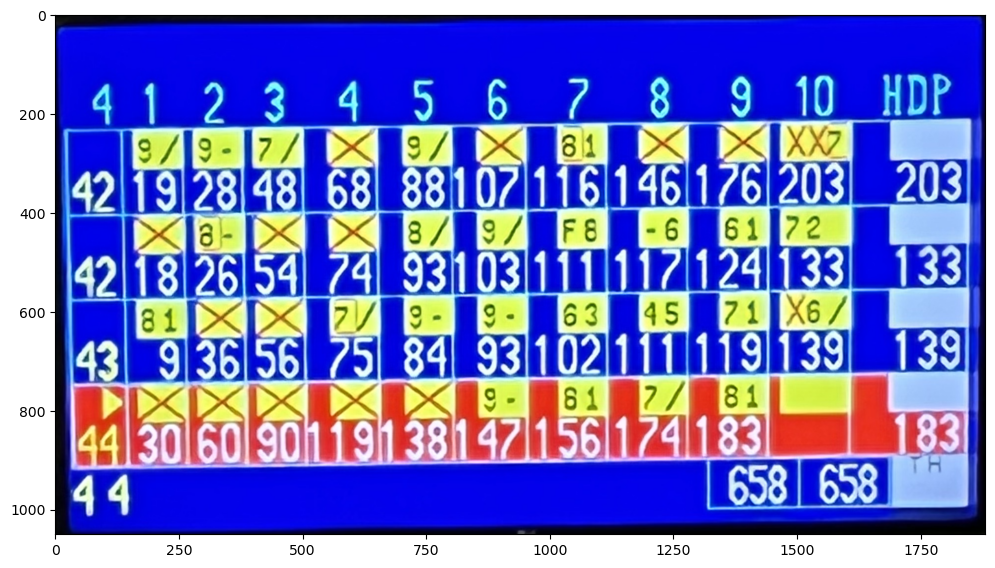

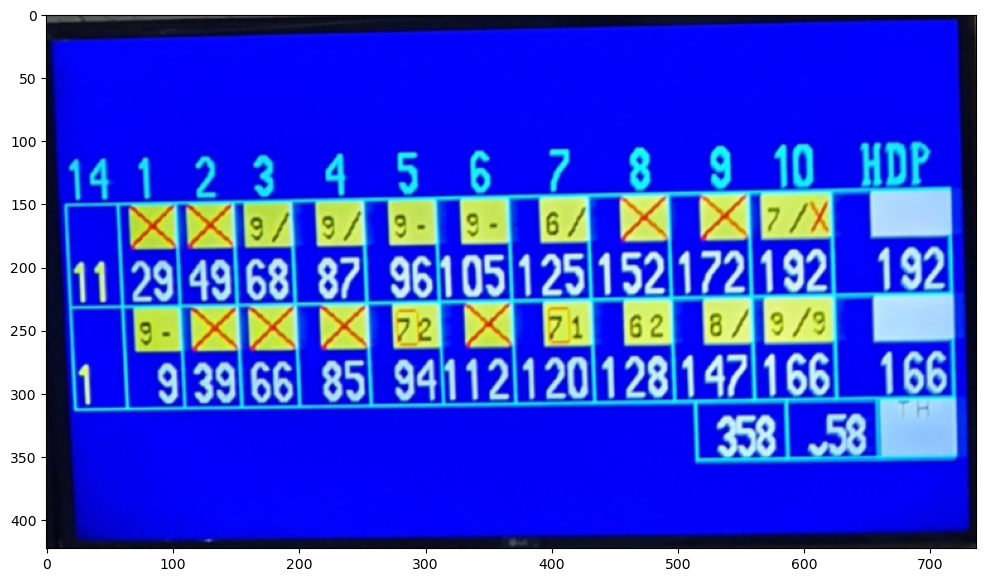

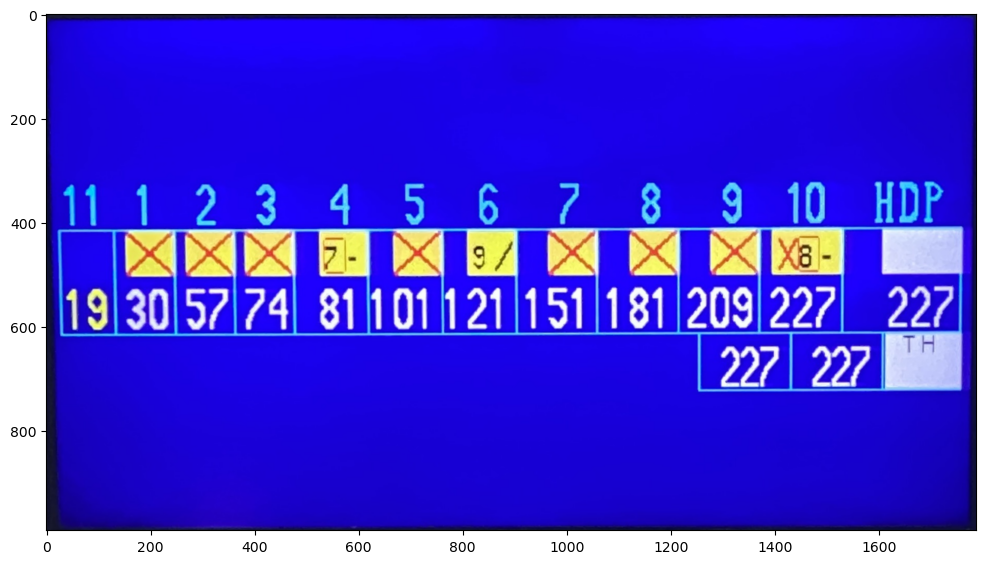

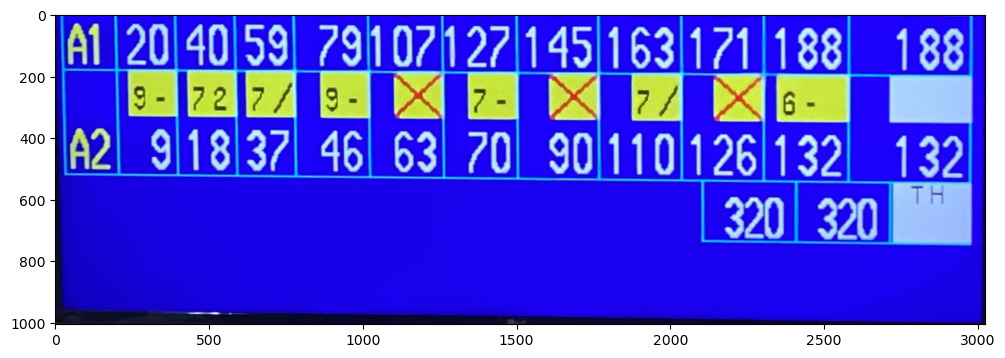

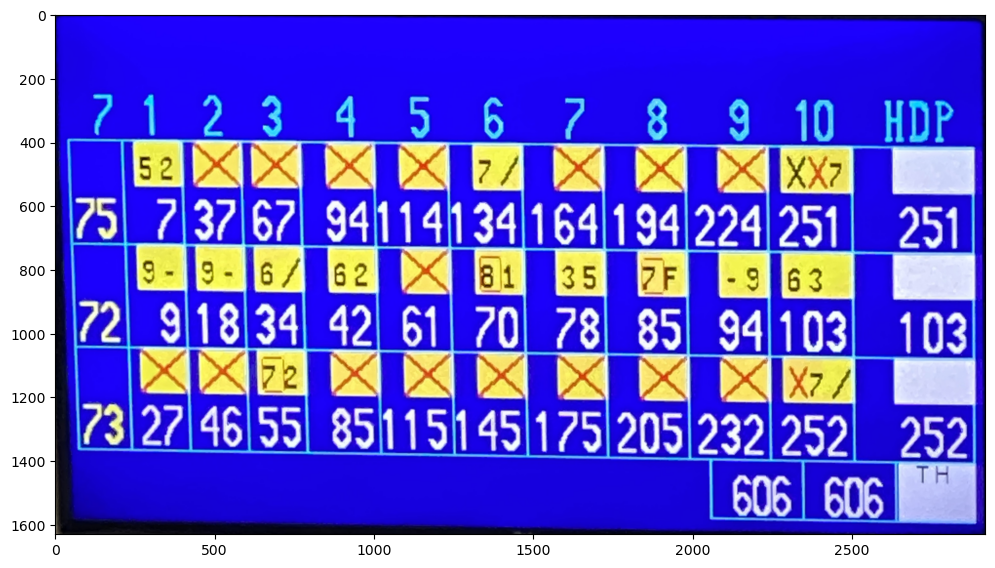

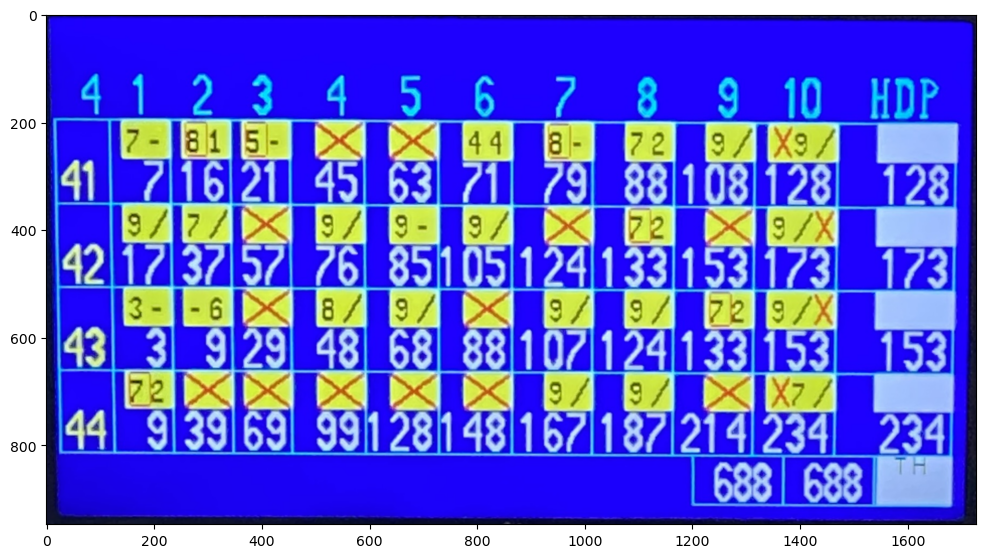

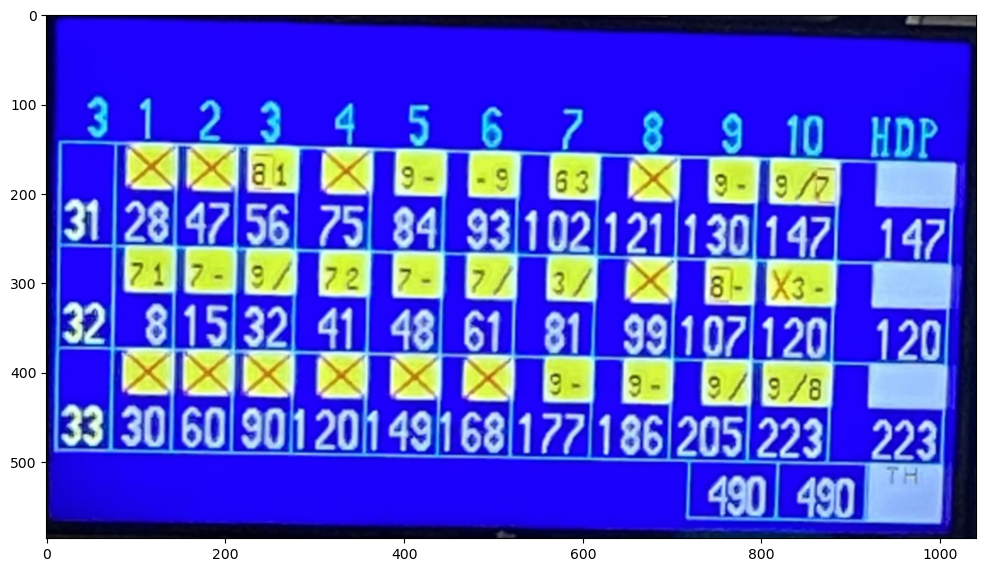

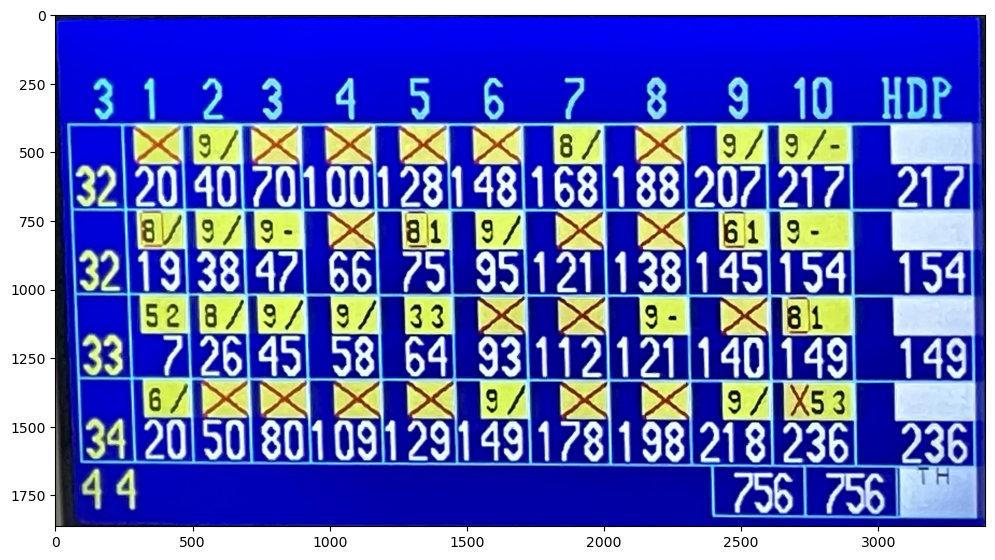

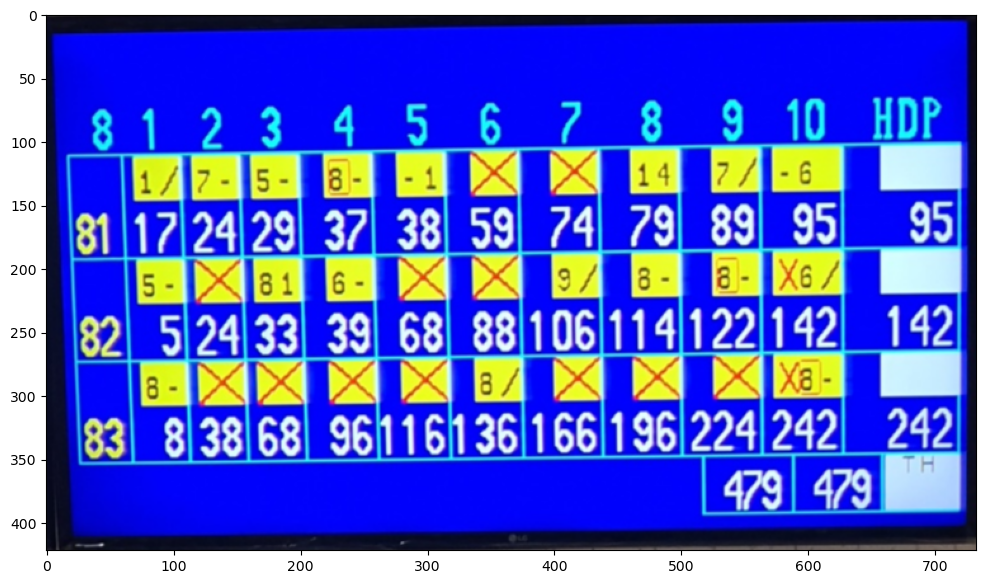

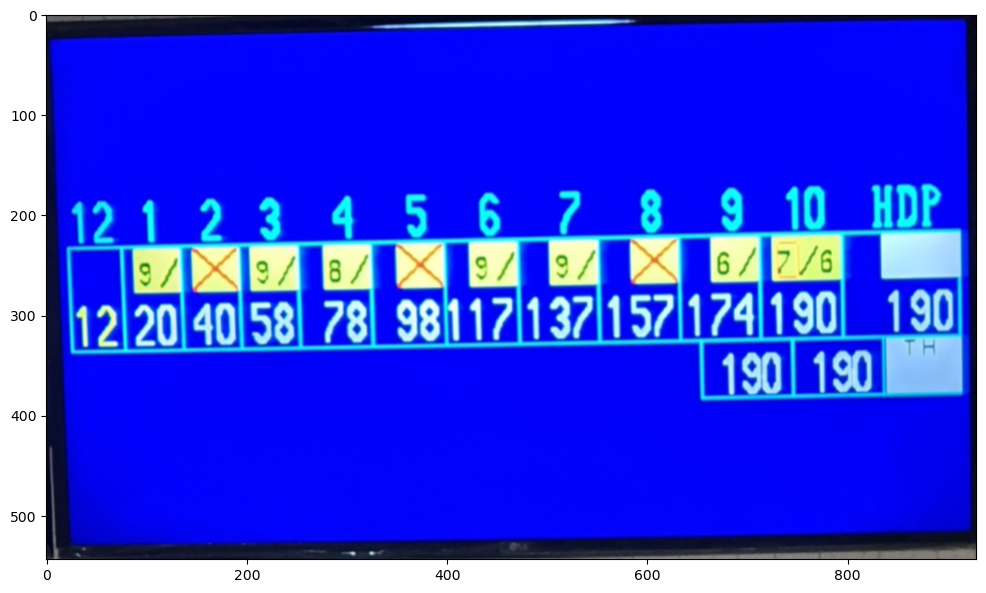

In [72]:
# files = search('./noCut')
# save_path = './board/'
# cnt = 1
# for f in files:
#     img_cropped = get_bowling_board(f)
#     plt.figure(figsize = (12,10))
#     plt.imshow(img_cropped)
#     for_save = cv2.cvtColor(img_cropped, cv2.COLOR_RGB2BGR)
#     for_save = cv2.resize(for_save, (2500, 1000))
#     cv2.imwrite(save_path + str(cnt) + '.jpg', for_save)
    
#     cnt += 1